In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
import h5py

In [2]:
zip_file_path=r'C:\Users\mahdi\Documents\jupyter-notebook\data_science_course\test\imbalance_data\archive (3).zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    data_file_name=zip_ref.namelist()[0]
    zip_ref.extractall()
os.remove(zip_file_path)

In [3]:
df=pd.read_csv(data_file_name)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


<Axes: >

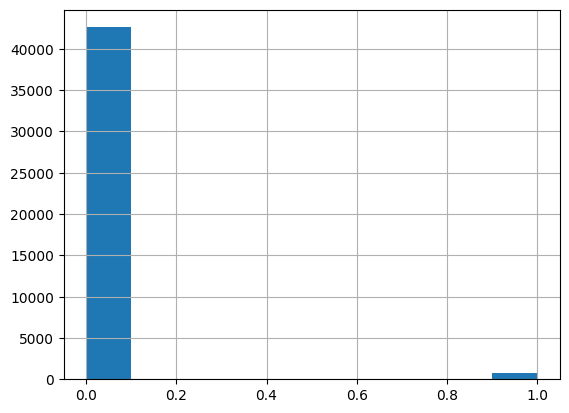

In [8]:
df['stroke'].hist()

In [9]:
dataset=df.copy()

In [10]:
dataset.dropna(subset=['smoking_status'], inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30108 entries, 1 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30108 non-null  int64  
 1   gender             30108 non-null  object 
 2   age                30108 non-null  float64
 3   hypertension       30108 non-null  int64  
 4   heart_disease      30108 non-null  int64  
 5   ever_married       30108 non-null  object 
 6   work_type          30108 non-null  object 
 7   Residence_type     30108 non-null  object 
 8   avg_glucose_level  30108 non-null  float64
 9   bmi                29072 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             30108 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 3.0+ MB


In [12]:
dataset.drop('id', axis=1, inplace=True)

In [13]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
X[:, 0]=le.fit_transform(X[:, 0])

In [16]:
X[:, 4]=le.fit_transform(X[:, 4])
X[:, 5]=le.fit_transform(X[:, 5])

In [17]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [18]:
np.shape(X[:, 8])

(30108,)

In [19]:
X[:, 8]=np.reshape(imp_mean.fit_transform(np.reshape(X[:, 8], (-1, 1))), (30108,))

In [20]:
X

array([[1, 58.0, 1, ..., 87.96, 39.2, 'never smoked'],
       [0, 70.0, 0, ..., 69.04, 35.9, 'formerly smoked'],
       [0, 52.0, 0, ..., 77.59, 17.7, 'formerly smoked'],
       ...,
       [0, 82.0, 1, ..., 91.94, 28.9, 'formerly smoked'],
       [1, 40.0, 0, ..., 99.16, 33.2, 'never smoked'],
       [0, 82.0, 0, ..., 79.48, 20.6, 'never smoked']], dtype=object)

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
ct=ColumnTransformer([('change_categorical', OneHotEncoder(drop='first',sparse_output=True), [6,9])],remainder='passthrough')

In [23]:
X=ct.fit_transform(X)

In [24]:
X

array([[1.0, 1.0, 0.0, ..., 2, 87.96, 39.2],
       [0.0, 0.0, 0.0, ..., 2, 69.04, 35.9],
       [1.0, 0.0, 0.0, ..., 2, 77.59, 17.7],
       ...,
       [1.0, 0.0, 0.0, ..., 2, 91.94, 28.9],
       [1.0, 1.0, 0.0, ..., 2, 99.16, 33.2],
       [1.0, 1.0, 0.0, ..., 2, 79.48, 20.6]], dtype=object)

In [25]:
h5_X = h5py.File('X.h5', 'w')
h5_X.create_dataset('features', data=np.array(X.astype(np.float64)))

<HDF5 dataset "features": shape (30108, 11), type "<f8">

In [26]:
h5_y = h5py.File('y.h5', 'w')
h5_y.create_dataset('target', data=np.array(y))

<HDF5 dataset "target": shape (30108,), type "<i8">